## Setup

### import packages

In [ ]:
install.packages('rcompanion')

: 

In [4]:
library(tidyr)
library(gridExtra)
library(dplyr)
library(datasets)
library(ggplot2)
library(Ecdat)
library(car)
library(multcomp)
library(gmodels)
library(rcompanion)

ERROR: Error in library(rcompanion): there is no package called 'rcompanion'


### import datasets

In [2]:

WinningNumbers <- read.csv("Lottery_Mega_Millions_Winning_Numbers__Beginning_2002_Wrangled.csv")
Wins <- read.csv("jackpot winners.csv")
SmallWins <- read.csv("nonjackpot winners.csv")
EdAid<- read.csv("Lottery_Aid_to_Education__Beginning_2002.csv")

## Data Wrangling

In [84]:
colnames(Wins)

[1] "Date"        "amount..won" "cash.prize"  "location"    "state"      
[6] "gender"

In [85]:
colnames(SmallWins)

[1] "ï..Draw.Date" "Prize"        "Gender"       "City"         "State"

In [3]:
names(Wins)[names(Wins) == "amount..won"] <- "Jackpot"
names(Wins)[names(Wins) == "state"] <- "State"
names(Wins)[names(Wins) == "location"] <- "Location"
names(Wins)[names(Wins) == "gender"] <- "Gender"
keeps <- c("Date", "Jackpot", "State", "Location", "Gender")
Wins <- Wins[keeps]
names(SmallWins)[names(SmallWins) == "ï..Draw.Date"] <- "Date"
names(SmallWins)[names(SmallWins) == "City"] <- "Location"

In [4]:
Wins2 <- merge(Wins, SmallWins, by=c("Date", "Location","State","Gender"), all=TRUE)
head(Wins2)

Date,Location,State,Gender,Jackpot,Prize
1/1/2008,"Fort Worth, Texas",TX,M,3.30e+07,NA
1/1/2019,"Long Island, N.Y",NY,Mixed,4.37e+08,NA
1/1/2019,Bayside,NY,M,NA,1000000
1/13/2009,"Merrick, N.Y.",NY,F,2.20e+07,NA
1/16/2015,"Naperville, Il",IL,M,2.65e+08,NA
1/18/2005,"Washington, Ga.",GA,F,1.31e+08,NA


## Data Exploration

In [107]:
JackpotByGender <- aggregate(Jackpot~Gender, Wins2, sum)
JackpotByGender

Gender,Jackpot
F,2717200000
M,8688200000
Mixed,7243500000
Unk,22607300000


In [103]:
PrizeByGender <- aggregate(Prize~Gender, Wins2, sum)
PrizeByGender

Gender,Prize
F,98204348
M,1306538101
Mixed,45973066
Unk,1170000000
M,3000000


In [89]:
Women = data.frame(Wins2 %>% filter(Gender == "F"))
Women

Date,Location,State,Gender,Jackpot,Prize
1/13/2009,"Merrick, N.Y.",NY,F,2.20e+07,NA
1/18/2005,"Washington, Ga.",GA,F,1.31e+08,NA
1/24/2012,"Atlanta, Ga",GA,F,7.20e+07,NA
1/4/2011,"Ephrata, Wash.",WA,F,1.90e+08,NA
1/5/2018,Duncan,OK,F,NA,3000000
1/8/2016,"Staten Island, N.Y.",NY,F,1.69e+08,NA
10/11/2016,Alexandria,VA,F,NA,1000000
10/23/2018,Aylett,VA,F,NA,1000000
10/23/2018,Dartmouth,MA,F,NA,1000000
10/5/2007,"Essex, Md.",MD,F,8.15e+07,NA


In [35]:
FWins<-Women$Jackpot
mean(FWins)

[1] 93696552

In [36]:
Men = data.frame(Wins2 %>% filter(Gender == "M"))
Men

Date,Jackpot,cash.prize,location,state,gender
7/16/2002,2.33e+07,NA,"Cliffside Park, N.J.",NJ,M
9/6/2002,2.33e+07,NA,"Kentwood, Mich.",MI,M
2/11/2003,2.33e+07,NA,"Brooklyn, N.Y.",NY,M
8/8/2003,2.33e+07,NA,"Savannah, Ga.",GA,M
9/30/2003,2.33e+07,NA,"Fitzgerald, Ga.",GA,M
11/11/2003,2.33e+07,NA,"Roswell, Ga.",GA,M
11/11/2003,2.33e+07,NA,"Roswell, Ga.",GA,M
3/2/2004,2.10e+07,NA,"Dayton, Ohio",OH,M
7/23/2004,4.70e+07,NA,"Pullman, Mich.",MI,M
7/27/2004,1.00e+07,NA,"Cherry Hill, N.J.",NJ,M


In [108]:
MWins<-Men$Jackpot
mean(MWins)

[1] 107261728

In [113]:
Groups = data.frame(Wins2 %>% filter(Gender == "Mixed"))
Groups

Date,Location,State,Gender,Jackpot,Prize
1/1/2019,"Long Island, N.Y",NY,Mixed,4.37e+08,NA
1/3/2014,"Nashville, Tenn",TN,Mixed,6.10e+07,NA
1/4/2011,"Rathdrum, Idaho.",ID,Mixed,1.90e+08,NA
10/1/2013,"Anne Arundel County, Md.",MD,Mixed,1.89e+08,NA
10/13/2017,"Waterford, MI",MI,Mixed,2.10e+07,NA
10/22/2021,lake havasu city AZ,AZ,Mixed,1.08e+08,NA
10/23/2018,Hudsonville,MI,Mixed,NA,1000000
10/23/2018,Mount Pleasant,MI,Mixed,NA,1000000
10/3/2008,"Washington, Mich.",MI,Mixed,4.20e+07,NA
11/10/2009,"Union County, N.J.",NJ,Mixed,3.85e+07,NA


In [114]:
GWins<-Groups$Jackpot
mean(GWins)

[1] NA

In [90]:
Unknown = data.frame(Wins2 %>% filter(Gender %in% c ("Unk", "Mixed")))
Unknown

Date,Location,State,Gender,Jackpot,Prize
1/1/2019,"Long Island, N.Y",NY,Mixed,4.370e+08,NA
1/3/2014,"Nashville, Tenn",TN,Mixed,6.100e+07,NA
1/4/2011,"Rathdrum, Idaho.",ID,Mixed,1.900e+08,NA
1/5/2018,"Port Richey, Fl",FL,Unk,4.510e+08,NA
1/9/2007,"Amarillo, Texas",TX,Unk,1.250e+08,NA
10/1/2004,"Carrollton, Texas",TX,Unk,1.060e+08,NA
10/1/2013,"Anne Arundel County, Md.",MD,Mixed,1.890e+08,NA
10/11/2016,"Rockwall, Texas",TX,Unk,4.900e+07,NA
10/13/2017,"Waterford, MI",MI,Mixed,2.100e+07,NA
10/22/2021,lake havasu city AZ,AZ,Mixed,1.080e+08,NA


In [95]:
UWins<-Unknown$Jackpot
mean(UWins)

[1] NA

In [93]:
SingleSex = data.frame(Wins2 %>% filter(Gender %in% c ("M", "F")))
SingleSex

Date,Location,State,Gender,Jackpot,Prize
1/1/2008,"Fort Worth, Texas",TX,M,3.30e+07,NA
1/1/2019,Bayside,NY,M,NA,1000000
1/13/2009,"Merrick, N.Y.",NY,F,2.20e+07,NA
1/16/2015,"Naperville, Il",IL,M,2.65e+08,NA
1/18/2005,"Washington, Ga.",GA,F,1.31e+08,NA
1/2/2009,"San Diego, Calif.",CA,M,4.70e+07,NA
1/24/2012,"Atlanta, Ga",GA,F,7.20e+07,NA
1/25/2013,"Orange, N.J",NJ,M,8.90e+07,NA
1/27/2017,"Nipton, Ca",CA,M,1.91e+08,NA
1/29/2010,"Katy, Texas.",TX,M,1.44e+08,NA


In [94]:
SWins<-SingleSex$Jackpot
mean(SWins)


[1] NA

In [ ]:
SWinsSmall<-SingleSex$Prize
mean(SWinsSmall)

t-test to see if  Women's Jackpots were significantly different than Men's.

In [44]:
t_dep <- t.test(FWins, MWins, paired =FALSE)
t_dep


	Welch Two Sample t-test

data:  FWins and MWins
t = -0.56984, df = 44.679, p-value = 0.5716
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -61520629  34390276
sample estimates:
mean of x mean of y 
 93696552 107261728 


t-test to see if Jackpots for Individual Winners and Single Sex Groups were significantly different than Jackpots for Mixed Groups and Winners where the Sex/Gender was unknown.

In [45]:
t2 <- t.test(SWins, UWins, paired =FALSE)
t2


	Welch Two Sample t-test

data:  SWins and UWins
t = -1.1803, df = 113.19, p-value = 0.2404
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -429853670  108891836
sample estimates:
mean of x mean of y 
103685455 264166372 


t-test to see if Jackpots for Individual Winners and Single Sex Groups were significantly different than Jackpots for Mixed Groups 



In [46]:
t3 <- t.test(SWins, GWins, paired =FALSE)
t3


	Welch Two Sample t-test

data:  SWins and GWins
t = -0.099208, df = 137.98, p-value = 0.9211
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -33606563  30395383
sample estimates:
mean of x mean of y 
103685455 105291045 


Which state has won the most 


In [47]:
CashByState <- aggregate(Jackpot~state, Wins, sum)
CashByState

state,Jackpot
,3.9200e+08
AK,1.7700e+08
AL,2.3300e+07
AZ,5.2200e+08
CA,3.8861e+09
FL,6.5800e+08
GA,1.5807e+09
ID,1.9000e+08
IL,1.6255e+09
IN,5.8250e+08


South Carolina has won the most prize money 

`geom_smooth()` using formula 'y ~ x'


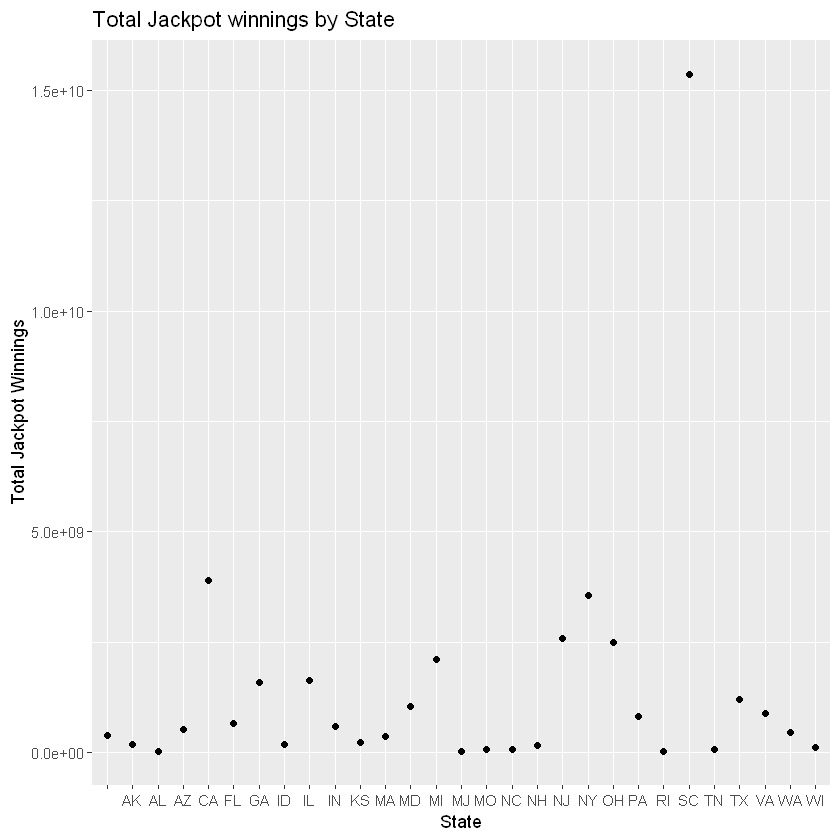

In [48]:
ggplot(CashByState, aes(y = Jackpot, x = state)) + geom_point() + geom_smooth(method='lm', se = TRUE) + ggtitle("Total Jackpot winnings by State")+ ylab("Total Jackpot Winnings") + xlab("State")

did the jackpots change over time?


In [49]:
CashByYear <- aggregate(Jackpot~year, WinningNumbers, sum)
CashByYear

year,Jackpot
2002,2.0970e+08
2003,4.6490e+08
2004,1.1190e+09
2005,1.4260e+09
2006,1.1900e+09
2007,1.7240e+09
2008,1.3030e+09
2009,1.5338e+09
2010,1.1210e+09
2011,1.6140e+09


`geom_smooth()` using formula 'y ~ x'


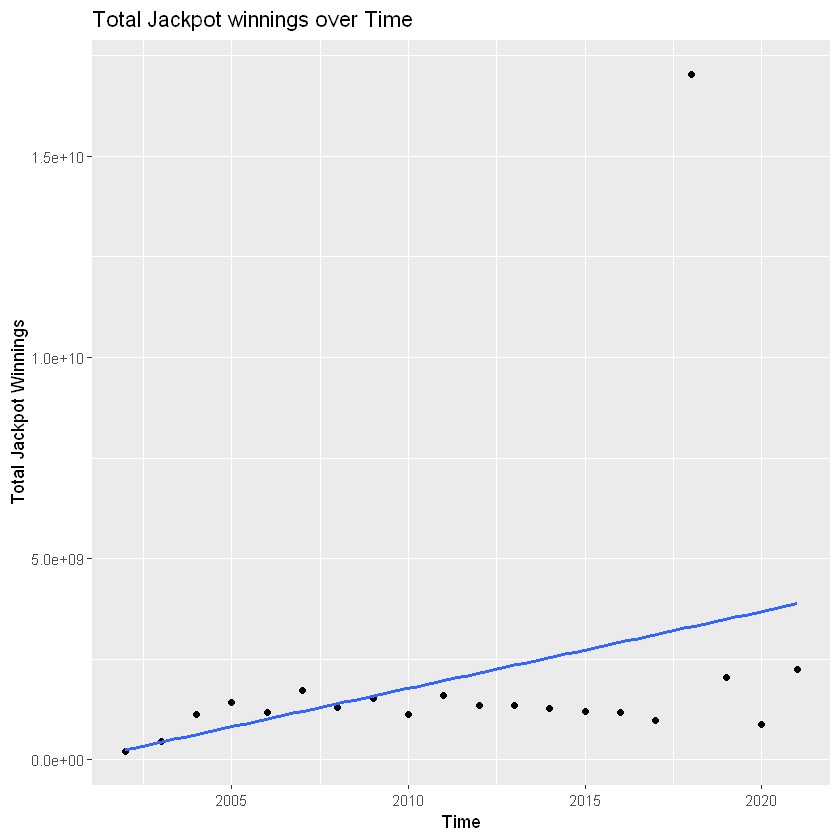

In [50]:
ggplot(CashByYear, aes(y = Jackpot, x = year)) + geom_point() + geom_smooth(method='lm', se = FALSE) + ggtitle("Total Jackpot winnings over Time")+ ylab("Total Jackpot Winnings") + xlab("Time")

## Analysis

## 1. In the Mega Millions, what are the optimal numbers to select in order to achieve a return on investment (ROI)?

### Testing Assumptions



#### 1. Normality


In [ ]:

plotNormalHistogram(cellPhone$Night.Mins)
#  normal   



#### 2. Homogeneity of Variance


In [ ]:

leveneTest(Night.Mins~International.Plan, data=cellPhone)


In [ ]:

# Levene's Test for Homogeneity of Variance (center = median)
#         Df F value Pr(>F)
# group    1  0.8646 0.3525
#       4615  

# Results were not significant, so the assumption is met!



#### 3. Homogeneity of Regression Slopes


In [ ]:

Homogeneity_RegrSlp = lm(Night.Mins~vMail.Plan, data=cellPhone)
anova(Homogeneity_RegrSlp)

# Analysis of Variance Table
# 
# Response: Night.Mins
#               Df    Sum Sq Mean Sq  F value  Pr(>F)
# vMail.Plan    1      488   487.73   0.1909   0.6622
# Residuals    4615 11791809 2555.10  

# This assumption is met. 



#### 4. Sample size


 is met - need 20 per IV or CV and I have 2, so need at least 40 and there are 4617 cases!



### Running the Analysis


In [ ]:

ANCOVA = lm(Night.Mins~vMail.Plan + International.Plan*vMail.Plan, data=cellPhone)
anova(ANCOVA)

# Analysis of Variance Table
# 
# Response: Night.Mins
# Df   Sum Sq Mean Sq F value  Pr(>F)  
# vMail.Plan                       1      488   487.7  0.1909 0.66216  
# International.Plan               1     7979  7978.6  3.1235 0.07724 .
# vMail.Plan:International.Plan    1      435   435.0  0.1703 0.67989  
# Residuals                     4613 11783396  2554.4                  
# ---
#   Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 
# the presence or absence of an international phone plan (International.Plan)
# does not influence the use of nighttime minutes (Night.Mins), even holding
# whether or not the client has a voicemail plan (vMail.Plan) constant.

## 2. In the NYS lottery, what are the optimal locations to play?

### Testing Assumptions



#### 1. Normality



In [ ]:

plotNormalHistogram(cellPhone$Night.Mins)
#  normal   




#### 2. Homogeneity of Variance


In [ ]:

bartlett.test(avgPriceSQRT ~ region, data=avocados1)

# Bartlett test of homogeneity of variances

# data:  avgPriceSQRT by region
# Bartlett's K-squared = 70.75, df = 2, p-value = 4.333e-16

fligner.test(avgPriceSQRT ~ region, data=avocados1)

# Fligner-Killeen test of homogeneity of variances
# 
# data:  avgPriceSQRT by region
# Fligner-Killeen:med chi-squared = 48.139, df = 2, p-value = 3.522e-11


# Does not meet the assumption for homogeneity of variance



#### 3. Sample Size


n = 1014, minium requirement of 20 cases is met



### Running the Analysis


In [ ]:

# Do the Test, with unequal variance
ANOVA1 <- lm(avgPriceSQRT ~ region, data=avocados1)
Anova(ANOVA1, Type="II", white.adjust=TRUE)

# Analysis of Deviance Table (Type II tests)
# 
# Response: avgPriceSQRT
#              Df      F      Pr(>F)    
# region       2     258.85   < 2.2e-16 ***
#   Residuals 1011                     
# ---
#   Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




#### Post Hocs Analysis


In [ ]:
pairwise.t.test(avocados1$avgPriceSQRT, avocados1$region, p.adjust="bonferroni", pool.sd = FALSE)

# Pairwise comparisons using t tests with non-pooled SD 
# 
# data:  avocados1$avgPriceSQRT and avocados1$region 
# 
#            Albany   Houston
#   Houston  < 2e-16   -      
#   Seattle  8.1e-06   < 2e-16
# 
# P value adjustment method: bonferroni 



##### Find means and draw conclusions


In [ ]:

avocadosMeans <- avocados1 %>% group_by(region) %>% summarize(Mean = mean(AveragePrice))
# A tibble: 3 x 2
#     region   Mean
#      <chr>   <dbl>
#   1 Albany   1.56
#   2 Houston  1.05
#   3 Seattle  1.44

# There is no significant difference in average price between the regions.


## 3. In NYS, how much does the lottery give back to society? Do certain counties benefit more?

### Testing Assumptions



#### 1. Normality


In [5]:
head(EdAid)

Beginning.Fiscal.Year,Ending.Fiscal.Year,County,School.District,Amount.of.Aid
2002,2003,Albany,Albany,7242297.0
2002,2003,Albany,Berne-Knox-Westerlo,874046.9
2002,2003,Albany,Bethlehem,2786954.7
2002,2003,Albany,Cohoes,1820297.9
2002,2003,Albany,Green Island,241859.9
2002,2003,Albany,Guilderland,3182536.1


In [8]:

plotNormalHistogram(EdAid$Amount.of.Aid)

ERROR: Error in plotNormalHistogram(EdAid$Amount.of.Aid): could not find function "plotNormalHistogram"


#### 2. Homogeneity of Variance


In [ ]:
Homogeneity_RegrSlp = lm(Night.Mins~vMail.Plan, data=cellPhone)
anova(Homogeneity_RegrSlp)

# Analysis of Variance Table
# 
# Response: Night.Mins
#               Df    Sum Sq Mean Sq  F value  Pr(>F)
# vMail.Plan    1      488   487.73   0.1909   0.6622
# Residuals    4615 11791809 2555.10  

# This assumption is met.


#### 3. Homogeneity of Regression Slopes


In [ ]:

Homogeneity_RegrSlp = lm(Night.Mins~vMail.Plan, data=cellPhone)
anova(Homogeneity_RegrSlp)

# Analysis of Variance Table
# 
# Response: Night.Mins
#               Df    Sum Sq Mean Sq  F value  Pr(>F)
# vMail.Plan    1      488   487.73   0.1909   0.6622
# Residuals    4615 11791809 2555.10  

# This assumption is met. 



#### 4. Sample size


 is met - need 20 per IV or CV and I have 2, so need at least 40 and there are 4617 cases!


### Running the Analysis

In [ ]:
ANCOVA = lm(Night.Mins~vMail.Plan + International.Plan*vMail.Plan, data=cellPhone)
anova(ANCOVA)

# Analysis of Variance Table
# 
# Response: Night.Mins
# Df   Sum Sq Mean Sq F value  Pr(>F)  
# vMail.Plan                       1      488   487.7  0.1909 0.66216  
# International.Plan               1     7979  7978.6  3.1235 0.07724 .
# vMail.Plan:International.Plan    1      435   435.0  0.1703 0.67989  
# Residuals                     4613 11783396  2554.4                  
# ---
#   Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 
# the presence or absence of an international phone plan (International.Plan)
# does not influence the use of nighttime minutes (Night.Mins), even holding
# whether or not the client has a voicemail plan (vMail.Plan) constant.